# Zestaw 9. Page Rank

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## 1. Prosty ranking wierzchołków

<i>Zaimplementuj prosty model błądzenia przypadkowego po grafie skierowanym.</i>

#### graf

In [45]:
def get_connected_graph(n):
    graph = nx.generators.directed.random_k_out_graph(n, n-2, 3)
    nodes = max(nx.strongly_connected_components(graph), key=len)
    connected_graph = nx.DiGraph()
    for node in nodes:
        for edge in graph.out_edges(node):
            connected_graph.add_edge(*edge)
    return connected_graph

In [48]:
def draw_graph(graph, pos):
    plt.figure(figsize=(10, 5))
    labels = {n: graph.nodes[n].get('weight', ' ') for n in graph.nodes}
    nx.draw(graph, pos=pos, with_labels=True, labels=labels, node_color='lawngreen')

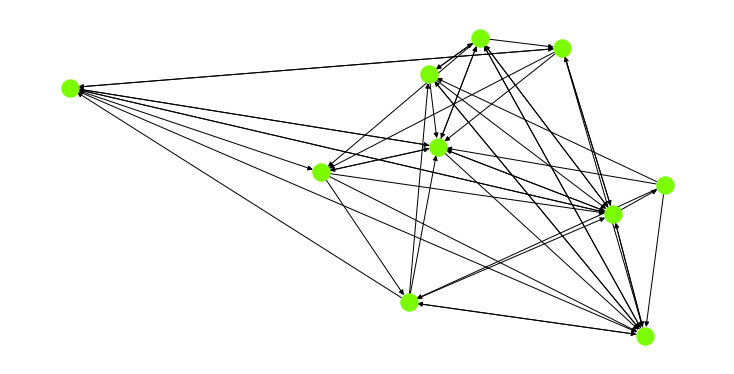

In [49]:
graph = get_connected_graph(10)
print(graph)
pos = nx.random_layout(graph)
draw_graph(graph, pos)

#### metoda potęgowa

In [50]:
def power_method(A, epsilon=1e-8, max_iteration=100):
    def norm_inf(x): return np.linalg.norm(x, np.inf)
    def normalize(x): return x/np.linalg.norm(x)
    
    n = A.shape[0]
    prev_x = np.ones(n)
    x = A @ prev_x
    
    max_x = norm_inf(x)
    x = x/max_x
    iteration = 1
    
    while iteration < max_iteration and not np.allclose(x, prev_x, atol=epsilon) and not np.allclose(x, -prev_x, atol=epsilon):
        x, prev_x = A @ x, x
        max_x = norm_inf(x)
        x = x/max_x
        iteration += 1
        
    return max_x, normalize(x), iteration

#### ranking

<i>Zaimplementuj prosty model błądzenia przypadkowego po grafie skierowanym</i>

In [74]:
def simple_rank(graph, d=1):
    n = graph.number_of_nodes()
    A = np.zeros((n, n))
    
    for u in range(n):
        for v in range(n):
            if (u, v) in graph.edges():
                A[u][v] = 1/len(graph.out_edges(u))
                
    _, r, _ = power_method(d*A.T)
    
    for u in range(n):
        graph.nodes[u]['weight'] = r[u]
    
    r /= np.linalg.norm(r, ord=1)
    return graph, r

In [75]:
graph, rank = simple_rank(graph)

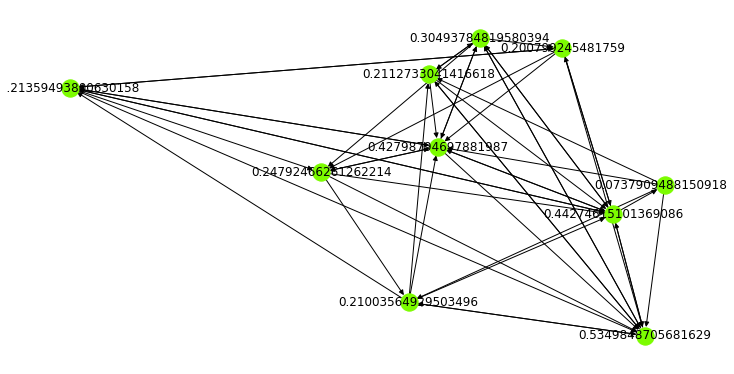

In [76]:
draw_graph(graph, pos)

## 2. Page Rank

In [252]:
def page_rank(graph, d, e):
    n = graph.number_of_nodes()
    A = np.zeros((n, n))
    
    for u in range(n):
        for v in range(n):
            if (u, v) in graph.edges():
                A[u][v] = 1/len(graph.out_edges(u))
    
    
    B = d*A + (1-d)*e
    
    _, r, _ = power_method(B.T)
    r /= np.linalg.norm(r, ord=1)
    
#     for u in graph.nodes():
#         graph.nodes[u]['weight'] = r[u]
    
    return graph, r

In [250]:
n = graph.number_of_nodes()
e = np.random.rand(n)
print(e)
e /= np.linalg.norm(e, ord=1)
graph, rank = page_rank(graph, 0.85, e)
print(rank)

[0.98687808 0.47788999 0.99930624 ... 0.88004789 0.43761016 0.30375138]


KeyboardInterrupt: 

In [ ]:
draw_graph(graph, pos)

przeanalizować wynik, zobaczyć co oznaczają, można porównać z pagerank z networkx

In [242]:
def graph_from_file(file_name):
    graph = nx.DiGraph()
    with open(file_name, 'r') as f:
        for line in f:
            if line[0] == '#': continue
            u, v = line.split('\t')
            graph.add_edge(u, v)
    return graph

In [243]:
graph = graph_from_file('Wiki-Vote.txt')

In [245]:
# pos = nx.random_layout(graph)
# draw_graph(graph, pos)

In [253]:
n = graph.number_of_nodes()
e = np.random.rand(n)
e /= np.linalg.norm(e, ord=1)
print(page_rank(graph, 0.85, e)[1])

[1.61822066e-04 1.09620840e-04 4.49692123e-05 ... 1.35598103e-04
 2.01886853e-04 4.09704966e-05]


## Wnioski